In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate a sample dataset
np.random.seed(0)
mean = [2, 3]
covariance = [[1, 0.5], [0.5, 1.5]]
sample_size = 1000
dataset = np.random.multivariate_normal(mean, covariance, size=sample_size)

In [3]:
dataset.shape

(1000, 2)

In [13]:
# Define the bandwidth parameter for the Gaussian kernel
bandwidth = 0.31

# Define a function to compute the Parzen-Rosenblatt Window estimation
def parzen_estimation(x, dataset, bandwidth):
    kernel_sum = 0
    n = len(dataset)
    d = len(dataset[0])
    for data_point in dataset:
        kernel_sum += multivariate_normal.pdf(x, mean=data_point, cov=np.eye(d) * bandwidth)
    return kernel_sum / (n * (bandwidth**d))

# Define a function to estimate the PDF for a range of points
def estimate_pdf(dataset, bandwidth, resolution=10):
    x = np.linspace(np.min(dataset[:, 0]), np.max(dataset[:, 0]), resolution)
    y = np.linspace(np.min(dataset[:, 1]), np.max(dataset[:, 1]), resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = parzen_estimation([X[i, j], Y[i, j]], dataset, bandwidth)
        print(i)
    return X, Y, Z

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


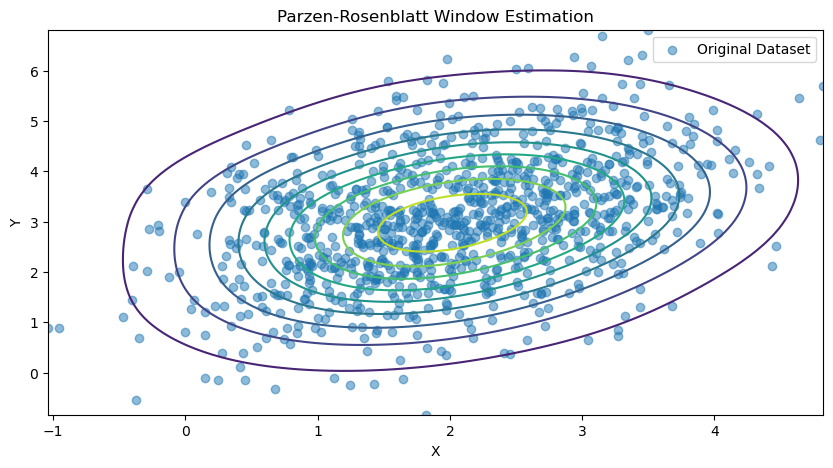

In [7]:


# Compute the estimated PDF
X, Y, Z = estimate_pdf(dataset, bandwidth)

# Plot the original dataset and estimated PDF
plt.figure(figsize=(10, 5))
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.5, label='Original Dataset')
plt.contour(X, Y, Z, levels=10, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen-Rosenblatt Window Estimation')
plt.legend()
plt.show()


0
1
2
3
4
5
6
7
8
9


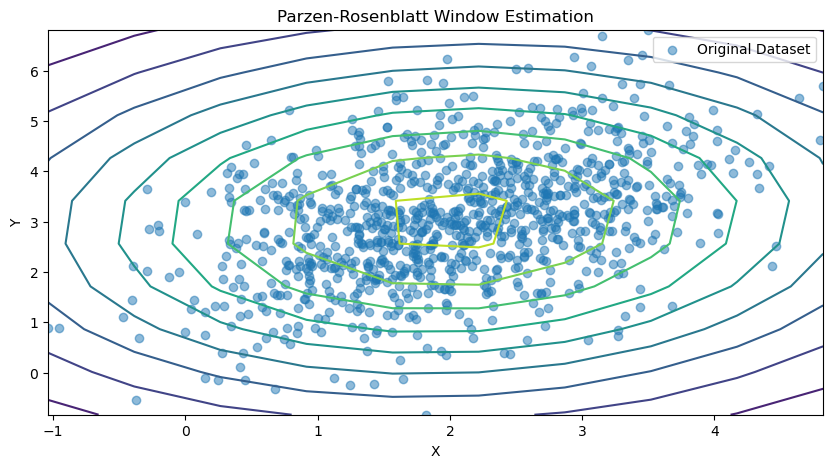

In [11]:
# Compute the estimated PDF
X, Y, Z = estimate_pdf(dataset, bandwidth)

# Plot the original dataset and estimated PDF
plt.figure(figsize=(10, 5))
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.5, label='Original Dataset')
plt.contour(X, Y, Z, levels=10, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen-Rosenblatt Window Estimation')
plt.legend()
plt.show()


In [12]:
1000**(-1/6)

0.31622776601683794

0
1
2
3
4
5
6
7
8
9


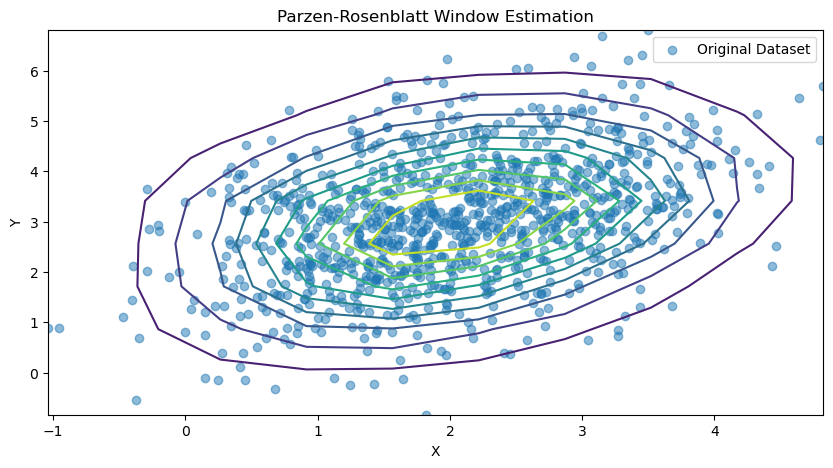

In [14]:
# Compute the estimated PDF
X, Y, Z = estimate_pdf(dataset, bandwidth)

# Plot the original dataset and estimated PDF
plt.figure(figsize=(10, 5))
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.5, label='Original Dataset')
plt.contour(X, Y, Z, levels=10, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen-Rosenblatt Window Estimation')
plt.legend()
plt.show()

In [2]:
def K(u) :
    return 0.5*(np.abs(u)<=1)

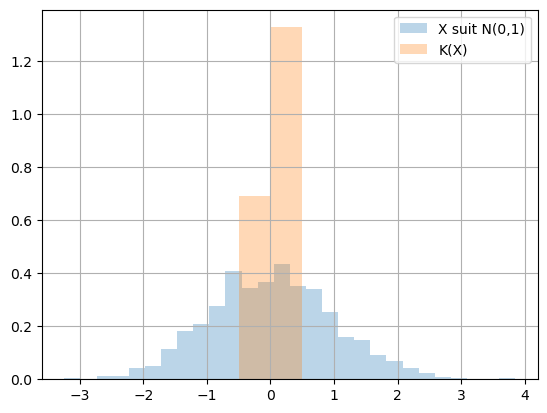

In [21]:
np.random.seed(42)
x = np.random.standard_normal(size=1000)
y = K(x)*x
plt.hist(x, bins='auto', density = True, alpha = .3, label='X suit N(0,1)')
"""
plt.grid()
plt.legend()
plt.show()
"""
plt.hist(y, bins=2, density= True, alpha = .3, label='K(X)')
plt.grid()
plt.legend()
plt.show()


In [16]:
x[:10]

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [17]:
K(x)[:10]

array([0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0.5])

In [19]:
(K(x)*x)[:10]

array([ 0.24835708, -0.06913215,  0.32384427,  0.        , -0.11707669,
       -0.11706848,  0.        ,  0.38371736, -0.23473719,  0.27128002])